The merged crop yield and ASOS weather data are stored in dictionaries which have been pickled and saved with gzip (reduces file size by ~90%). They separated by state, and the dictionaries have the following format:

state dictionary
    key: county name
    value: data dictionary
        key: 'distance', 'yield', 'temp', or 'precip'
        value: 'distance' is # of km from the county center to the closest station
               'yield' is a dictionary  where the key is the year and value is the yield
               'temp' is a dictionary where key is the year and value is a list of tuples: (year, month, day, hour, temp)
               'precip' is a dictionary where key is the year and value is a list of tuples: (year, month, day, hour, precip)

In [1]:
import pickle
import gzip
import ag_utils

mergedCropWx = {}

with gzip.open('merged-crop-wx-ca.pgz', 'rb') as f:
    mergedCropWx = pickle.load(f)

In [6]:
# to get the list of counties...
mergedCropWx.keys()

dict_keys(['glenn', 'other (combined) counties', 'sacramento', 'solano', 'yolo', 'kern', 'merced', 'san joaquin', 'sutter', 'stanislaus', 'colusa', 'kings', 'tulare', 'butte', 'fresno', 'tehama', 'yuba', 'madera', 'san bernardino', 'contra costa', 'imperial', 'riverside', 'humboldt', 'placer', 'santa barbara', 'alameda', 'sonoma', 'siskiyou', 'san diego', 'san luis obispo', 'amador', 'shasta', 'san benito', 'monterey', 'santa clara', 'los angeles', 'ventura', 'san mateo', 'calaveras', 'lassen', 'modoc', 'lake', 'mendocino', 'el dorado', 'orange'])

In [9]:
# counties that were matched have data dictionaries 
print(mergedCropWx['sacramento'].keys())

# if no match, an empty dictionary
print(mergedCropWx['glenn'])

dict_keys(['distance', 'yield', 'temp', 'precip'])
{}


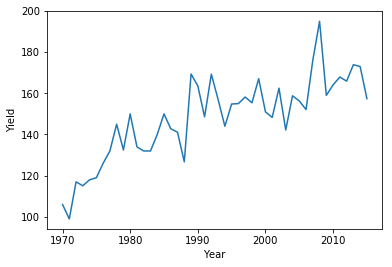

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# yield dictionary keys are years and values are annual yields
years = list(mergedCropWx['sacramento']['yield'].keys())
yields = list(mergedCropWx['sacramento']['yield'].values())

plt.plot(years, yields)
plt.xlabel('Year')
plt.ylabel('Yield')

In [22]:
import numpy

# get all temps and associated year
years = numpy.array(mergedCropWx['sacramento']['year']).astype('float')
temps = numpy.array(mergedCropWx['sacramento']['temp']).astype('float')

# find all indices that have missing data (-999)
nanInds = numpy.where(temps == -999)

# replace with nan
years[nanInds] = numpy.nan
temps[nanInds] = numpy.nan

annualMeanTemps = []

# loop over all years
uniqueYears = numpy.unique(years)
for y in uniqueYears:
    
    # find indices of this year
    ind = numpy.where(years == y)
    
    # take mean of all temps in that year
    annualMeanTemps.append(numpy.mean(temps[ind]))


plt.plot(uniqueYears, annualMeanTemps)
plt.xlabel('Year')
plt.ylabel('Annual mean temp')

13.9